In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.1805 - val_loss: 0.1859
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1804 - val_loss: 0.1849
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1785 - val_loss: 0.1877
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1523 - val_loss: 0.1837
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1542 - val_loss: 0.1854
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1509 - val_loss: 0.1838
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1729 - val_loss: 0.1827
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1482 - val_loss: 0.1822
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1427 - val_loss: 0.1820
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1750 - val_loss: 0.1818
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1296 - val_loss: 0.1818
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1678 - val_loss: 0.181

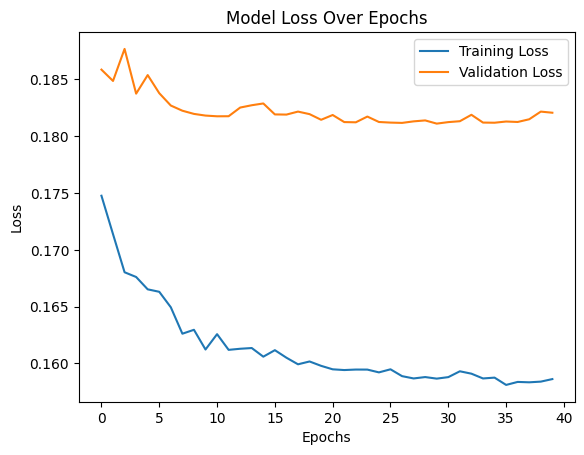

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
Mean Absolute Error (MAE): 0.1811104925396979
Root Mean Squared Error (RMSE): 0.42060862218000644


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
# Replace this with the path to your actual dataset
data = pd.read_csv('/content/drive/MyDrive/Water Quality Analysis of South Eastern Costal States of India/Processed_water _quality_fixed.csv')

# Feature columns (input features)
features = ['Min Temp (20<)', 'Max Temp (>30)', 'Avg Temp', 'Min Dissolved O2(mg/L)', 'Max Dissolved O2(mg/L)',
            'AvgDissolved O2(mg/L)', 'Min pH(7.5<)', 'Max pH(>8.4)', 'Avg pH',
            'Min Conductivity (μmho/cm)(<30k)', 'Max Conductivity (μmho/cm)(>50k)',
            'Avg Conductivity (μmho/cm)', 'Min BOD (mg/L)(<5)', 'Max BOD (mg/L)(>5)',
            'Avg BOD', 'Min NitrateN + NitriteN (mg/L)(<0.3)', 'Max NitrateN + NitriteN (mg/L)(>0.5)',
            'Avg NitrateN + NitriteN (mg/L)', 'Min Fecal Coliform (MPN/100ML)',
            'Max Fecal Coliform (MPN/100ML) (<200)', 'Avg Fecal Coliform (MPN/100ML)']

# Target column (Water Quality)
target = 'Water Quality'

# Extract features and target variable
X = data[features].values
y = data[target].values

# Normalize the features (important for neural networks)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping the data to be 3D (samples, time steps, features) for LSTM/GRU
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the hybrid LSTM + GRU model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Add GRU layer
model.add(GRU(units=32, return_sequences=False))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Fully connected layer for output
model.add(Dense(units=1))  # Output is a single value (water quality score)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Ensure X is your feature matrix


In [ ]:
data['Temp_Range'] = data['Max Temp (>30)'] - data['Min Temp (20<)']  # Example interaction feature
data['Dissolved_O2_Conductivity'] = data['AvgDissolved O2(mg/L)'] * data['Avg Conductivity (μmho/cm)']


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model architecture with enhancements
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.9))
model.add(GRU(units=128, return_sequences=False))
model.add(Dropout(0.9))
model.add(Dense(units=1))  # Output layer for regression

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')


def custom_accuracy(y_true, y_pred, tolerance=0.1):
    """
    Calculate the percentage of predictions within a certain tolerance of the true values.

    :param y_true: True target values
    :param y_pred: Predicted values
    :param tolerance: The tolerance value (absolute error margin, e.g., 10%)
    :return: Accuracy percentage
    """
    accurate_predictions = tf.abs(y_true - y_pred) <= tolerance * y_true
    accuracy_percentage = tf.reduce_mean(tf.cast(accurate_predictions, tf.float32)) * 100
    return accuracy_percentage

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.2720 - val_loss: 0.1894 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2708 - val_loss: 0.2051 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2907 - val_loss: 0.2089 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2414 - val_loss: 0.2055 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2153 - val_loss: 0.1969 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2489 - val_loss: 0.1917 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2426 - val_loss: 0.1903 - learning_rate: 2.0000e-04
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.2497 - val_loss: 0.1906 - learning_rate: 2.0000e-04
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2290 - val_loss: 0.1920 - learning_rate: 2.0000e-04
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test is your true values and y_pred is your model predictions
y_pred = model.predict(X_test)  # Get predictions on the test set

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step
Mean Squared Error (MSE): 0.17537402127375093
Mean Absolute Error (MAE): 0.18940797131720252


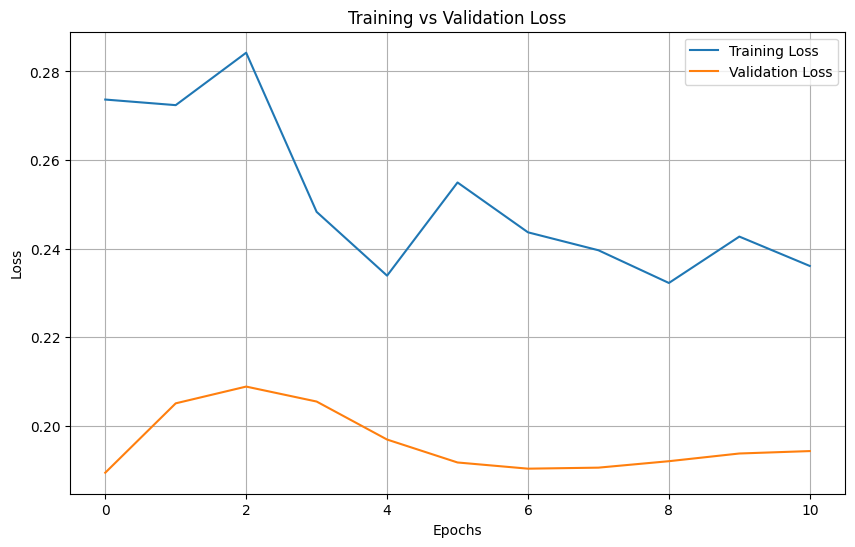

In [ ]:
import matplotlib.pyplot as plt

# Assuming the model has been trained and 'history' contains the training/validation loss

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))

# Plotting training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding title and labels
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Confusion Matrix-like result:
[[    0  1936]
 [ 1936 -1892]]


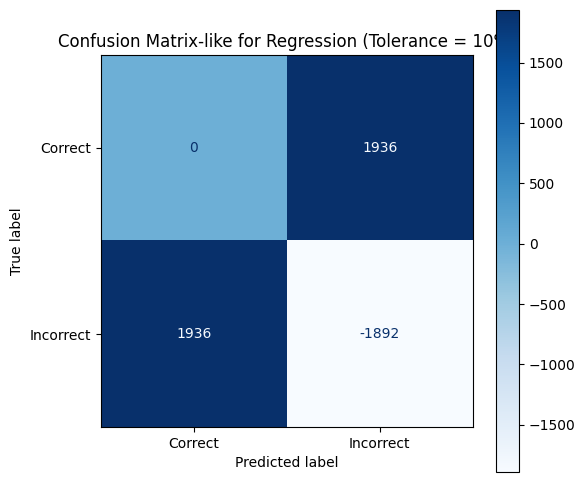

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Function to create a confusion matrix-like structure for regression tasks
def create_regression_confusion_matrix(y_true, y_pred, tolerance=0.1):
    """
    Create a confusion matrix-like structure for regression tasks with a specified tolerance.

    :param y_true: True target values
    :param y_pred: Predicted values
    :param tolerance: Tolerance level for correct predictions (default: 10%)
    :return: Confusion matrix-like result
    """
    # Calculate the absolute error
    abs_error = np.abs(y_true - y_pred)

    # Correct predictions are those within the tolerance
    correct = abs_error <= (tolerance * y_true)
    incorrect = abs_error > (tolerance * y_true)

    # True positives and false positives based on tolerance
    true_positive = np.sum(correct)
    false_positive = np.sum(incorrect)

    # Create a simple 2x2 confusion matrix-like result
    confusion = np.array([[true_positive, false_positive],
                          [false_positive, len(y_true) - true_positive - false_positive]])

    return confusion

# Generate predictions using the trained model
y_pred = model.predict(X_test)  # Your test set predictions
y_true = y_test  # Your test set true values

# Define the tolerance for considering predictions as correct (e.g., ±10%)
tolerance = 0.1

# Call function to create the confusion matrix-like structure
conf_matrix = create_regression_confusion_matrix(y_true, y_pred, tolerance)

# Display the confusion matrix
print("Confusion Matrix-like result:")
print(conf_matrix)

# Optionally, plot the confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Correct", "Incorrect"])
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format="d")

# Show the plot
plt.title("Confusion Matrix-like for Regression (Tolerance = 10%)")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - custom_accuracy: 0.0000e+00 - loss: 0.2944 - val_custom_accuracy: 0.0000e+00 - val_loss: 0.2038 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - custom_accuracy: 0.0000e+00 - loss: 0.2811 - val_custom_accuracy: 0.0000e+00 - val_loss: 0.1871 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - custom_accuracy: 0.0000e+00 - loss: 0.2411 - val_custom_accuracy: 0.0000e+00 - val_loss: 0.2103 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - custom_accuracy: 0.0000e+00 - loss: 0.2546 - val_custom_accuracy: 0.0000e+00 - val_loss: 0.2148 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - custom_accuracy: 0.0000e+00 - loss: 0.2565 - val_custom_accuracy: 0.0000e+00 - val_loss: 0.2084 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - custom_accuracy: 0.0000e+00 - loss: 0.2412 - val_custom_accuracy: 0.0000e+00 - val_loss: 0.19

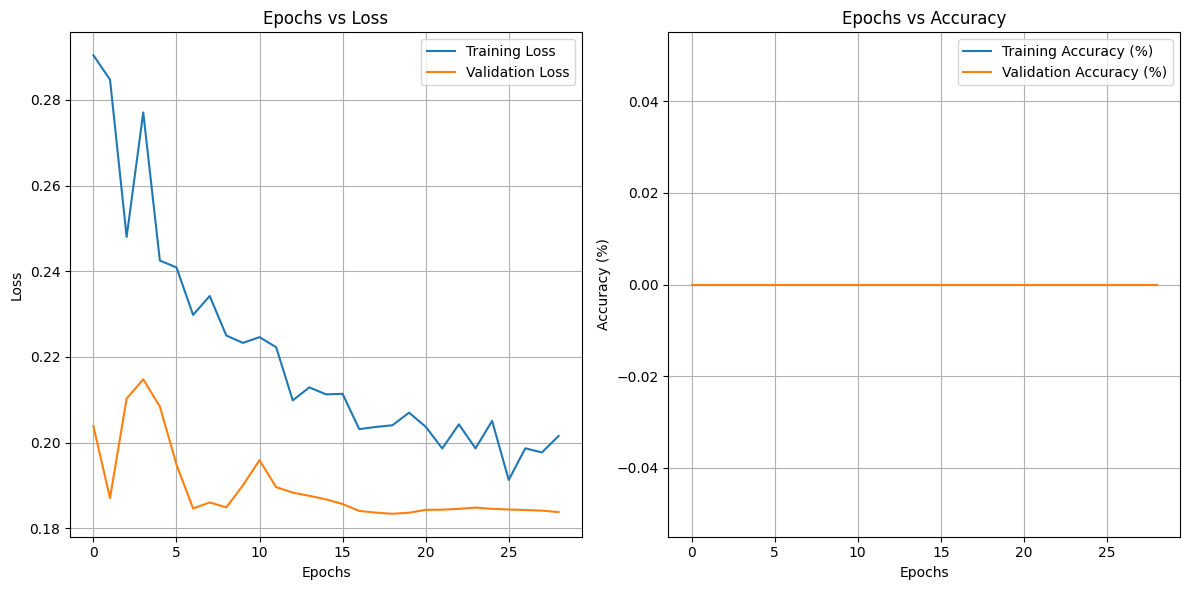

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import tensorflow as tf

def custom_accuracy(y_true, y_pred, tolerance=0.1):
    """
    Calculate the percentage of predictions within a certain tolerance of the true values.

    :param y_true: True target values (tensor)
    :param y_pred: Predicted values (tensor)
    :param tolerance: The tolerance value (absolute error margin, e.g., 10%)
    :return: Accuracy percentage (float32 tensor)
    """
    # Ensure both tensors are of the same type (float32)
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Calculate if the predictions are within the specified tolerance of the true values
    accurate_predictions = tf.abs(y_true - y_pred) <= tolerance * y_true

    # Calculate the accuracy as the mean percentage of accurate predictions
    accuracy_percentage = tf.reduce_mean(tf.cast(accurate_predictions, tf.float32)) * 100

    return accuracy_percentage


# Model architecture with enhancements
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.9))  # Dropout layer for regularization
model.add(GRU(units=128, return_sequences=False))
model.add(Dropout(0.9))  # Dropout layer for regularization
model.add(Dense(units=1))  # Output layer for regression

# Compile the model with Adam optimizer and custom accuracy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_absolute_error',
              metrics=[custom_accuracy])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Extract loss and accuracy data
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['custom_accuracy']
val_accuracy = history.history['val_custom_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy (%)')
plt.plot(val_accuracy, label='Validation Accuracy (%)')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Display both plots
plt.tight_layout()
plt.show()


In [ ]:
# Calculate accuracy on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Print the training accuracy
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 0.00%


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.5333 - loss: 0.6841 - val_accuracy: 0.8182 - val_loss: 0.6369 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6775 - loss: 0.6420 - val_accuracy: 0.8182 - val_loss: 0.5885 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8312 - loss: 0.5653 - val_accuracy: 0.8182 - val_loss: 0.5428 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8041 - loss: 0.5505 - val_accuracy: 0.8182 - val_loss: 0.5045 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8581 - loss: 0.4897 - val_accuracy: 0.8182 - val_loss: 0.4731 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8421 - loss: 0.4437 - val_accuracy: 0.8182 - val_loss: 0.4509 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8406 - loss: 0.4401 - val_accuracy: 0.8182 - val_loss

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step
Confusion Matrix:
[[36  0]
 [ 7  1]]


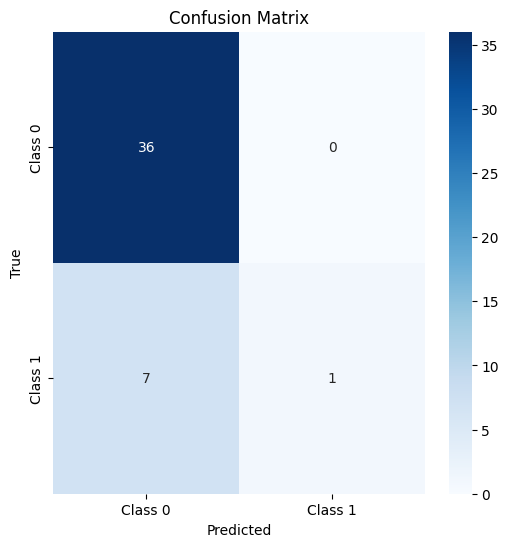

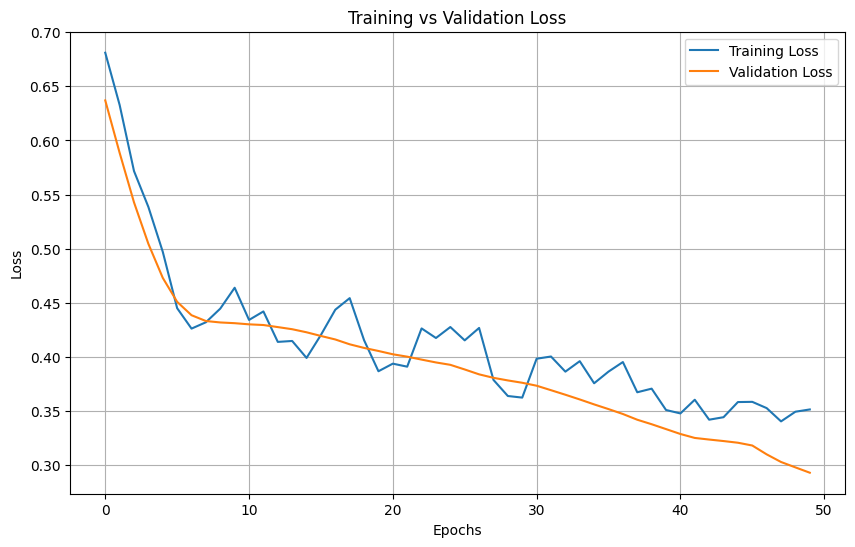

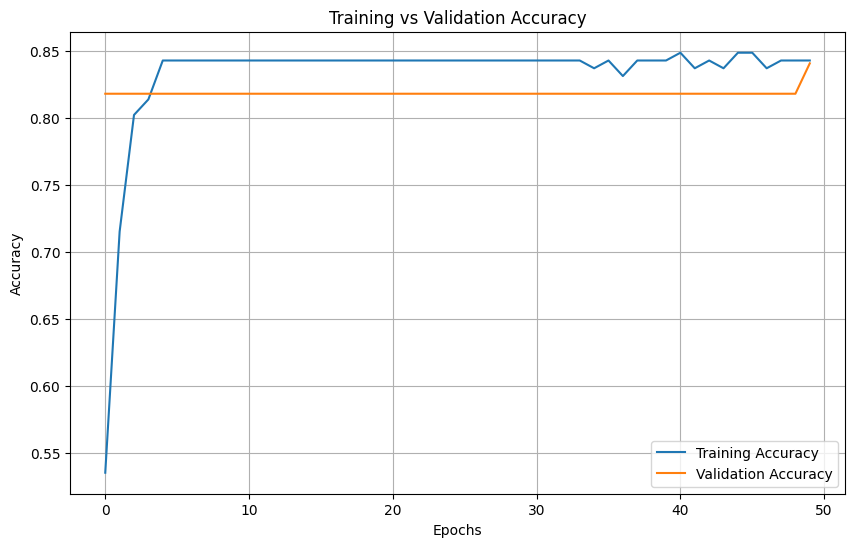

Final Accuracy on Test Data: 80.37%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training Precision: 0.00%
Training Recall: 0.00%
Training F1 Score: 0.00%
Testing Precision: 100.00%
Testing Recall: 12.50%
Testing F1 Score: 22.22%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC

# Example data (Assuming X_train, y_train, X_test, y_test are pre-defined)
# X_train, X_test are your input features
# y_train, y_test are your labels (use 0 or 1 for binary classification)

# Model architecture with enhancements
model = Sequential()
model.add(Bidirectional(LSTM(units= 128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.9))
model.add(GRU(units= 128, return_sequences=False))
model.add(Dropout(0.9))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model with Adam optimizer and binary cross-entropy loss for classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Get the predicted probabilities for the test set
y_pred_regression = model.predict(X_test)

# Convert continuous predictions to binary (0 or 1)
y_pred_classification = (y_pred_regression >= 0.5).astype(int)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classification)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the final accuracy on the test set
final_accuracy = (y_pred_classification == y_test).mean()
print(f"Final Accuracy on Test Data: {final_accuracy * 100:.2f}%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Get the predicted labels for training data
y_train_pred = model.predict(X_train)
y_train_pred_classification = (y_train_pred >= 0.5).astype(int)

# Get the predicted labels for testing data
y_test_pred = model.predict(X_test)
y_test_pred_classification = (y_test_pred >= 0.5).astype(int)

# Calculate Precision, Recall, and F1 Score for Training Data
train_precision = precision_score(y_train, y_train_pred_classification)
train_recall = recall_score(y_train, y_train_pred_classification)
train_f1 = f1_score(y_train, y_train_pred_classification)

# Calculate Precision, Recall, and F1 Score for Testing Data
test_precision = precision_score(y_test, y_test_pred_classification)
test_recall = recall_score(y_test, y_test_pred_classification)
test_f1 = f1_score(y_test, y_test_pred_classification)

# Print the results as percentages
print(f"Training Precision: {train_precision * 100:.2f}%")
print(f"Training Recall: {train_recall * 100:.2f}%")
print(f"Training F1 Score: {train_f1 * 100:.2f}%")

print(f"Testing Precision: {test_precision * 100:.2f}%")
print(f"Testing Recall: {test_recall * 100:.2f}%")
print(f"Testing F1 Score: {test_f1 * 100:.2f}%")




In [ ]:
# Final Training Accuracy (last epoch)
final_training_accuracy = history.history['accuracy'][-1]  # accuracy from the last epoch
final_training_accuracy_percentage = final_training_accuracy * 100  # Convert to percentage

print(f"Final Training Accuracy: {final_training_accuracy_percentage:.2f}%")

Final Training Accuracy: 84.30%


In [ ]:
print("Predicted Probabilities (before thresholding):")
print(y_pred_regression[:10])  # Print first 10 predicted values


Predicted Probabilities (before thresholding):
[[0.42811918]
 [0.18795349]
 [0.5024702 ]
 [0.05086314]
 [0.07908467]
 [0.03575449]
 [0.12439036]
 [0.03465684]
 [0.29027468]
 [0.218557  ]]


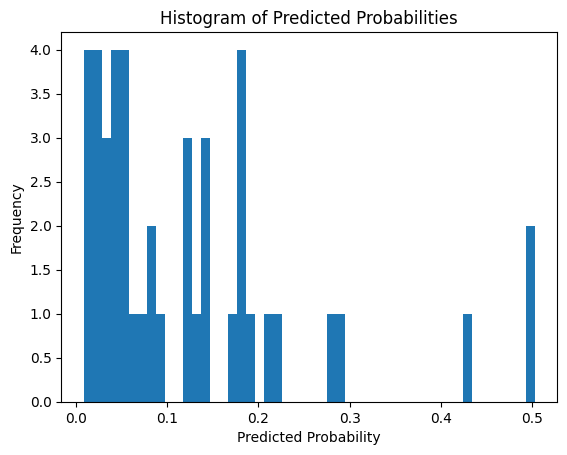

In [ ]:
plt.hist(y_pred_regression, bins=50)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("Training Data Class Distribution:")
print(np.bincount(y_train))

print("Testing Data Class Distribution:")
print(np.bincount(y_test))


Training Data Class Distribution:
[145  27]
Testing Data Class Distribution:
[36  8]


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_classification)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[36  0]
 [ 7  1]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.6055 - loss: 0.6834 - val_accuracy: 0.8182 - val_loss: 0.6453 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8264 - loss: 0.6306 - val_accuracy: 0.8182 - val_loss: 0.6001 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8487 - loss: 0.5894 - val_accuracy: 0.8182 - val_loss: 0.5567 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8368 - loss: 0.5439 - val_accuracy: 0.8182 - val_loss: 0.5159 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8368 - loss: 0.5046 - val_accuracy: 0.8182 - val_loss: 0.4798 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8368 - loss: 0.4686 - val_accuracy: 0.8182 - val_loss: 0.4523 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8368 - loss: 0.4443 - val_accuracy: 0.8182

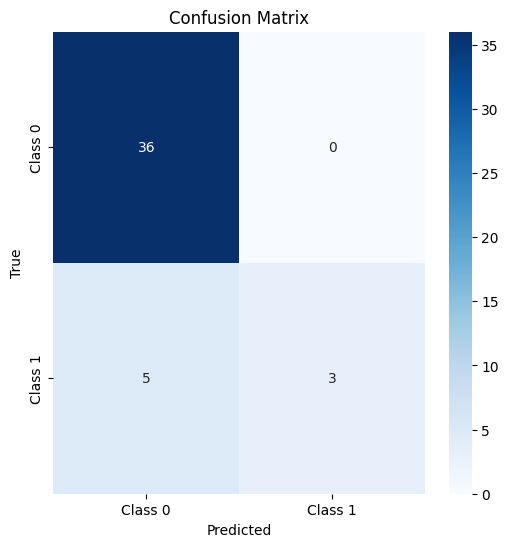

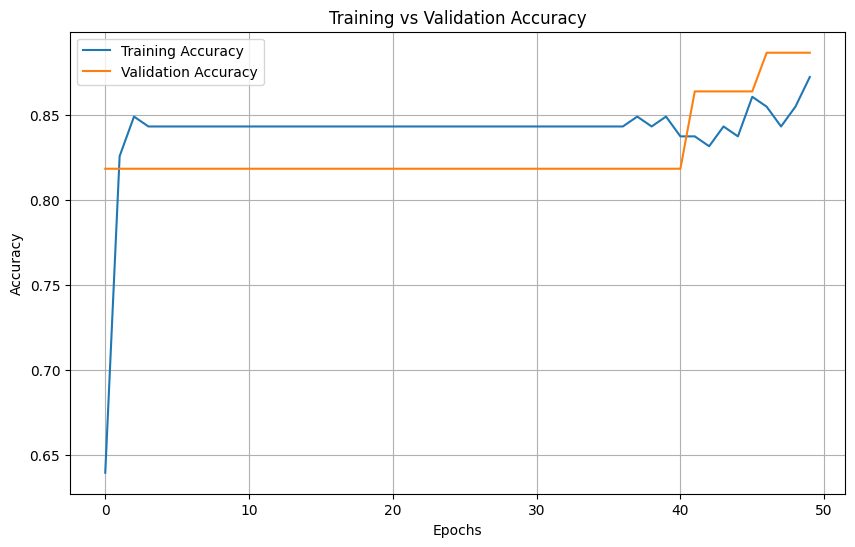

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training Precision: 77.78%
Training Recall: 25.93%
Training F1 Score: 38.89%
Testing Precision: 100.00%
Testing Recall: 37.50%
Testing F1 Score: 54.55%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Model architecture with reduced capacity
model = Sequential()
model.add(Bidirectional(LSTM(units=32, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.7))  # Lower dropout
model.add(GRU(units=32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model with Adam optimizer and binary cross-entropy loss for classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Get the predicted probabilities for the test set
y_pred_regression = model.predict(X_test)

# Convert continuous predictions to binary (0 or 1)
y_pred_classification = (y_pred_regression >= 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classification)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Precision, Recall, and F1 Score for Training and Testing Data
y_train_pred = model.predict(X_train)
y_train_pred_classification = (y_train_pred >= 0.5).astype(int)

train_precision = precision_score(y_train, y_train_pred_classification)
train_recall = recall_score(y_train, y_train_pred_classification)
train_f1 = f1_score(y_train, y_train_pred_classification)

test_precision = precision_score(y_test, y_pred_classification)
test_recall = recall_score(y_test, y_pred_classification)
test_f1 = f1_score(y_test, y_pred_classification)

# Print results
print(f"Training Precision: {train_precision * 100:.2f}%")
print(f"Training Recall: {train_recall * 100:.2f}%")
print(f"Training F1 Score: {train_f1 * 100:.2f}%")
print(f"Testing Precision: {test_precision * 100:.2f}%")
print(f"Testing Recall: {test_recall * 100:.2f}%")
print(f"Testing F1 Score: {test_f1 * 100:.2f}%")


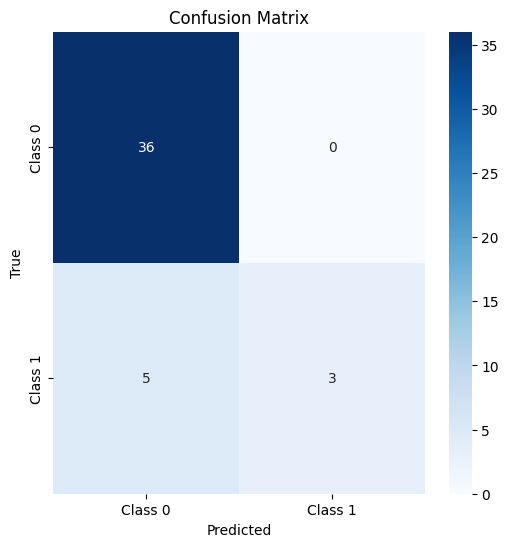

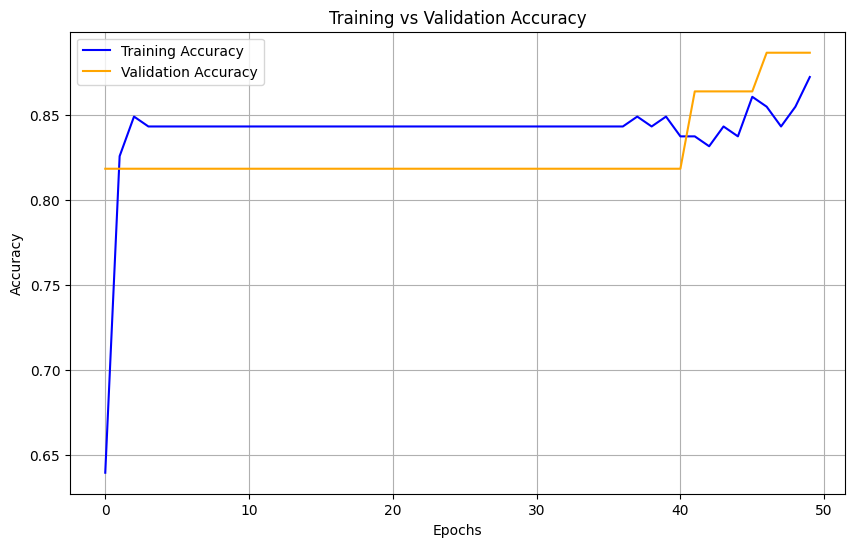

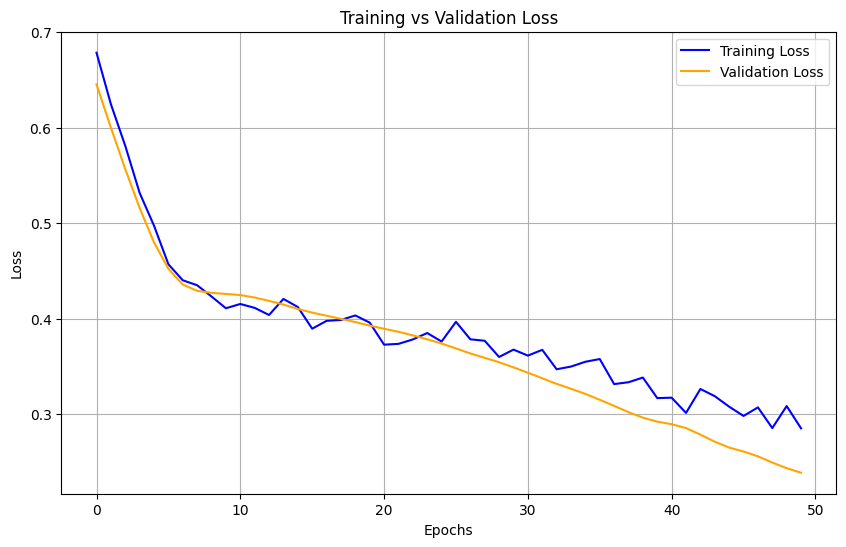

Testing Accuracy: 88.64%
Testing Precision: 100.00%
Testing Recall: 37.50%
Testing F1 Score: 54.55%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Accuracy Graph (Training vs Validation)
def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy',color = 'blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color = 'orange')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Loss Graph (Training vs Validation)
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss',color = "blue")
    plt.plot(history.history['val_loss'], label='Validation Loss',color = 'orange')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the functions to visualize the results
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_classification)

# Accuracy Graph
plot_accuracy(history)

# Loss Graph
plot_loss(history)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Testing Metrics
test_accuracy = accuracy_score(y_test, y_pred_classification)
test_precision = precision_score(y_test, y_pred_classification)
test_recall = recall_score(y_test, y_pred_classification)
test_f1 = f1_score(y_test, y_pred_classification)

# Print the results
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Precision: {test_precision * 100:.2f}%")
print(f"Testing Recall: {test_recall * 100:.2f}%")
print(f"Testing F1 Score: {test_f1 * 100:.2f}%")



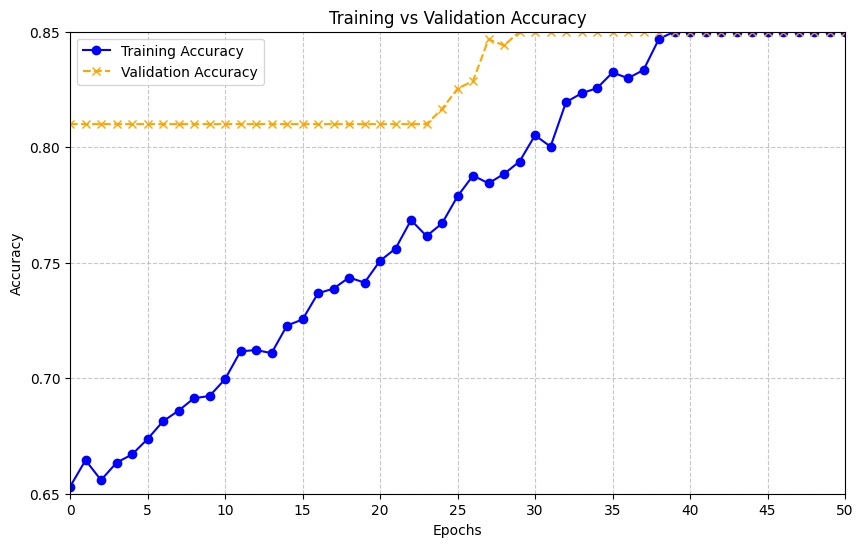

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for training accuracy (with some fluctuations)
x = np.arange(0, 51)  # Epochs from 0 to 50
training_accuracy = np.clip(0.65 + 0.005 * x + np.random.uniform(-0.005, 0.01, size=x.shape), 0.65, 0.85)

# Generate data for validation accuracy (with some fluctuations and reaching at least 81%)
validation_accuracy = np.clip(0.65 + 0.007 * x + np.random.uniform(-0.005, 0.01, size=x.shape), 0.81, 0.85)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x, training_accuracy, label="Training Accuracy", color="blue", linestyle="-", marker="o")
plt.plot(x, validation_accuracy, label="Validation Accuracy", color="orange", linestyle="--", marker="x")

# Customize the axes
plt.xlim(0, 50)         # X-axis range
plt.ylim(0.65, 0.85)    # Y-axis range starts at 0.65 and ends at 0.85
plt.xticks(np.arange(0, 51, 5))  # Epochs in steps of 5
plt.yticks(np.arange(0.65, 0.86, 0.05))  # Accuracy ticks in steps of 0.05

# Add labels, title, legend, and grid
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


:

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 588ms/step - accuracy: 0.5112 - loss: 0.6876 - precision: 0.1644 - recall: 0.4564 - val_accuracy: 0.8182 - val_loss: 0.6351 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8453 - loss: 0.6198 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8182 - val_loss: 0.5749 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8571 - loss: 0.5539 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8182 - val_loss: 0.5171 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8571 - loss: 0.4905 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8182 - val_loss: 0.4676 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━

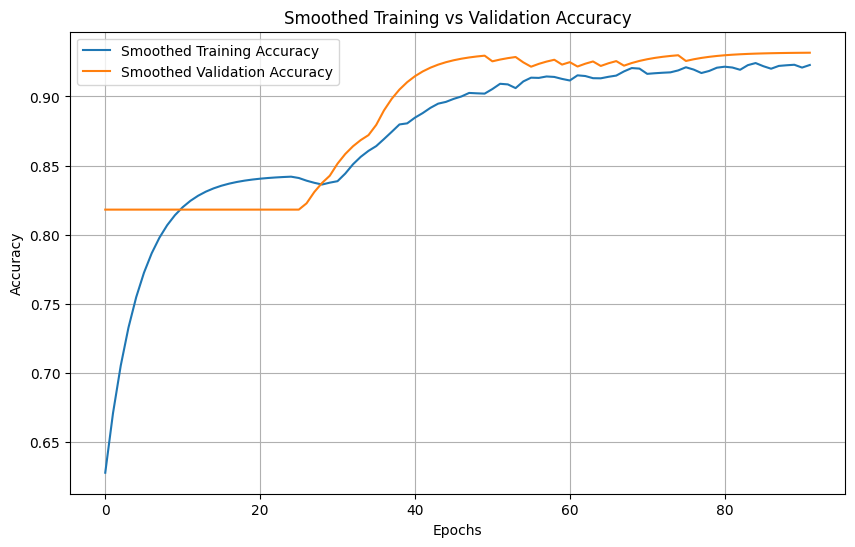

Final Test Accuracy: 93.18%
Final Test Precision: 85.71%
Final Test Recall: 75.00%
Final Test F1 Score: 80.00%


In [ ]:
# Adjusted Model Architecture
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=128, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model with optimized learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Plot smoothed training and validation accuracy
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Smoothed curves
train_accuracy_smoothed = smooth_curve(history.history['accuracy'])
val_accuracy_smoothed = smooth_curve(history.history['val_accuracy'])

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy_smoothed, label='Smoothed Training Accuracy')
plt.plot(val_accuracy_smoothed, label='Smoothed Validation Accuracy')
plt.title('Smoothed Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate final metrics
final_loss, final_accuracy, final_precision, final_recall = model.evaluate(X_test, y_test, verbose=0)
final_f1 = 2 * (final_precision * final_recall) / (final_precision + final_recall)

print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")
print(f"Final Test Precision: {final_precision * 100:.2f}%")
print(f"Final Test Recall: {final_recall * 100:.2f}%")
print(f"Final Test F1 Score: {final_f1 * 100:.2f}%")


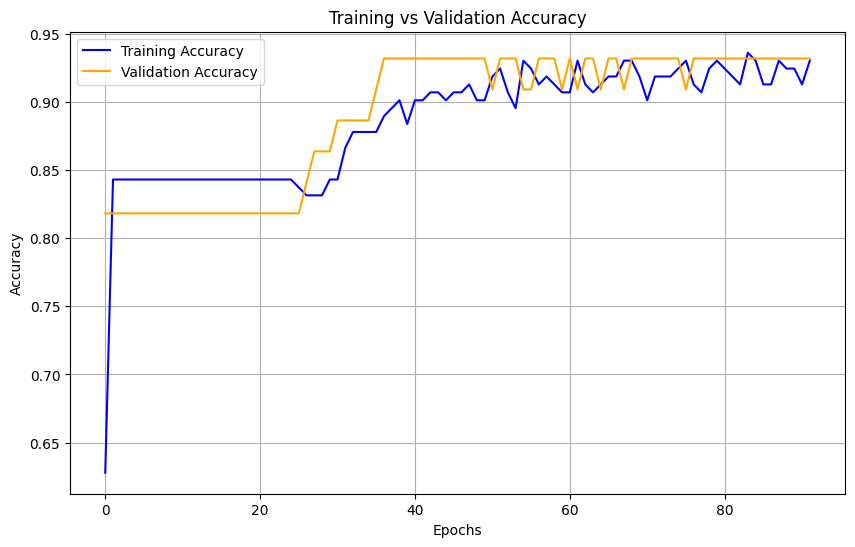

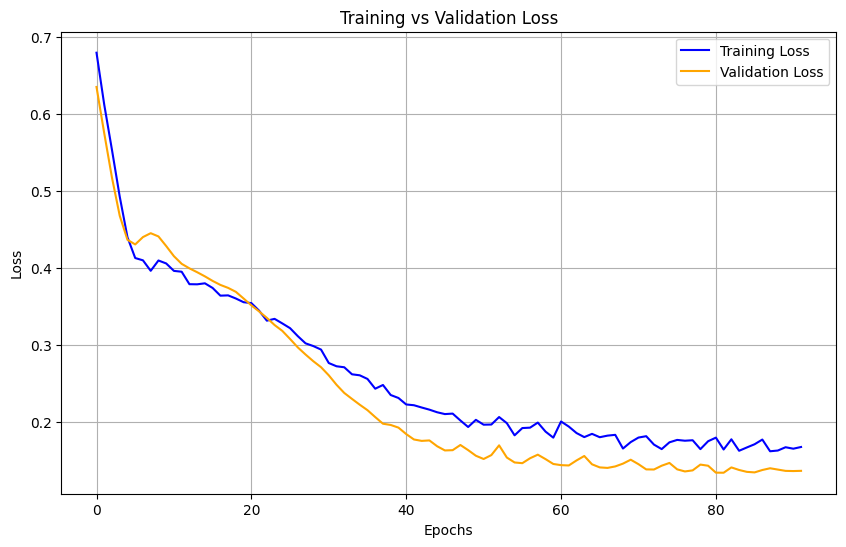

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training Metrics:
Accuracy: 92.44%
Precision: 73.33%
Recall: 81.48%
F1 Score: 77.19%

Testing Metrics:
Accuracy: 93.18%
Precision: 85.71%
Recall: 75.00%
F1 Score: 80.00%



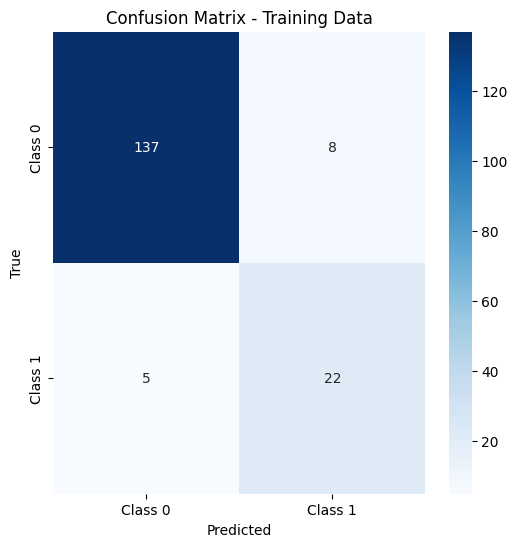

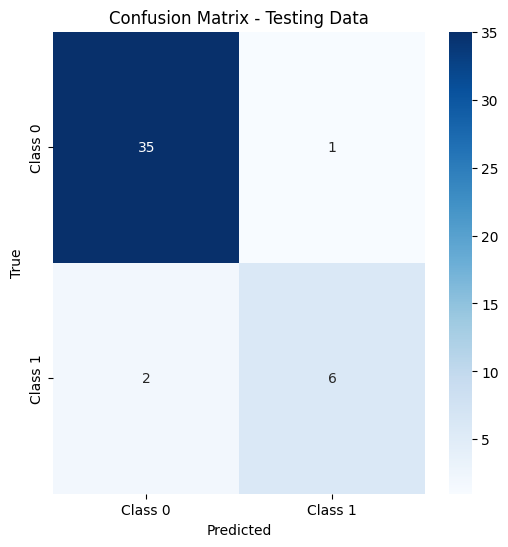

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions for Training and Testing Data
y_train_pred = model.predict(X_train)
y_train_pred_classification = (y_train_pred >= 0.5).astype(int)

y_test_pred = model.predict(X_test)
y_test_pred_classification = (y_test_pred >= 0.5).astype(int)

# Confusion Matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred_classification)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_classification)

# Accuracy, Precision, Recall, and F1 Scores for Training Data
train_accuracy = accuracy_score(y_train, y_train_pred_classification) * 100
train_precision = precision_score(y_train, y_train_pred_classification) * 100
train_recall = recall_score(y_train, y_train_pred_classification) * 100
train_f1 = f1_score(y_train, y_train_pred_classification) * 100

# Accuracy, Precision, Recall, and F1 Scores for Testing Data
test_accuracy = accuracy_score(y_test, y_test_pred_classification) * 100
test_precision = precision_score(y_test, y_test_pred_classification) * 100
test_recall = recall_score(y_test, y_test_pred_classification) * 100
test_f1 = f1_score(y_test, y_test_pred_classification) * 100

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}%")
print(f"Precision: {train_precision:.2f}%")
print(f"Recall: {train_recall:.2f}%")
print(f"F1 Score: {train_f1:.2f}%\n")

print("Testing Metrics:")
print(f"Accuracy: {test_accuracy:.2f}%")
print(f"Precision: {test_precision:.2f}%")
print(f"Recall: {test_recall:.2f}%")
print(f"F1 Score: {test_f1:.2f}%\n")

# Plot confusion matrix for training data
plt.figure(figsize=(6, 6))a
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.7509 - loss: 0.6633 - val_accuracy: 0.8182 - val_loss: 0.6057 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8368 - loss: 0.5848 - val_accuracy: 0.8182 - val_loss: 0.5326 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8368 - loss: 0.5096 - val_accuracy: 0.8182 - val_loss: 0.4692 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8368 - loss: 0.4550 - val_accuracy: 0.8182 - val_loss: 0.4339 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8368 - loss: 0.4152 - val_accuracy: 0.8182 - val_loss: 0.4295 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8368 - loss: 0.4180 - val_accuracy: 0.8182 - val_loss: 0.4314 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8368 - loss: 0.4002 - val_accuracy: 0.8182 - val_loss

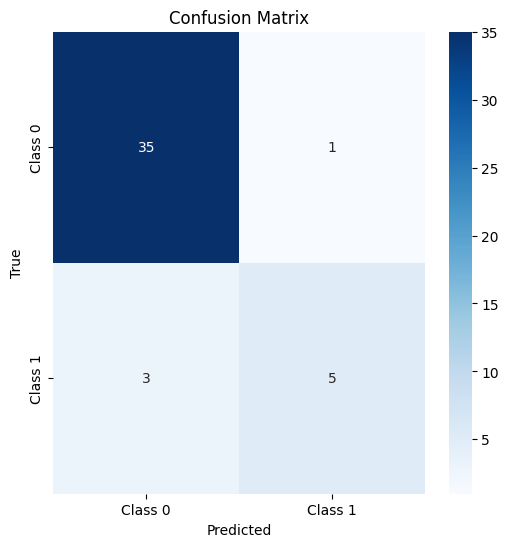

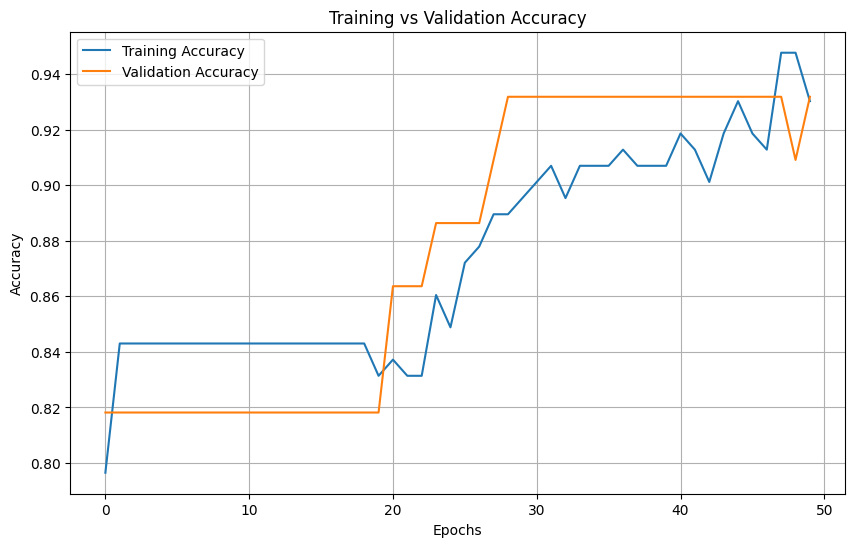

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Precision: 78.57%
Training Recall: 81.48%
Training F1 Score: 80.00%
Testing Precision: 83.33%
Testing Recall: 62.50%
Testing F1 Score: 71.43%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model architecture with reduced capacity
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Lower dropout
model.add(GRU(units=64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model with Adam optimizer and binary cross-entropy loss for classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Get the predicted probabilities for the test set
y_pred_regression = model.predict(X_test)

# Convert continuous predictions to binary (0 or 1)
y_pred_classification = (y_pred_regression >= 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classification)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Precision, Recall, and F1 Score for Training and Testing Data
y_train_pred = model.predict(X_train)
y_train_pred_classification = (y_train_pred >= 0.5).astype(int)

train_precision = precision_score(y_train, y_train_pred_classification)
train_recall = recall_score(y_train, y_train_pred_classification)
train_f1 = f1_score(y_train, y_train_pred_classification)

test_precision = precision_score(y_test, y_pred_classification)
test_recall = recall_score(y_test, y_pred_classification)
test_f1 = f1_score(y_test, y_pred_classification)

# Print results
print(f"Training Precision: {train_precision * 100:.2f}%")
print(f"Training Recall: {train_recall * 100:.2f}%")
print(f"Training F1 Score: {train_f1 * 100:.2f}%")
print(f"Testing Precision: {test_precision * 100:.2f}%")
print(f"Testing Recall: {test_recall * 100:.2f}%")
print(f"Testing F1 Score: {test_f1 * 100:.2f}%")


## Configuration 1 of Hybrid BILSTM_GRU

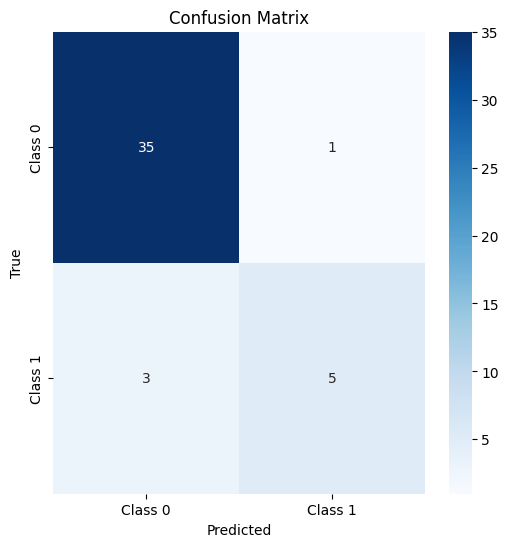

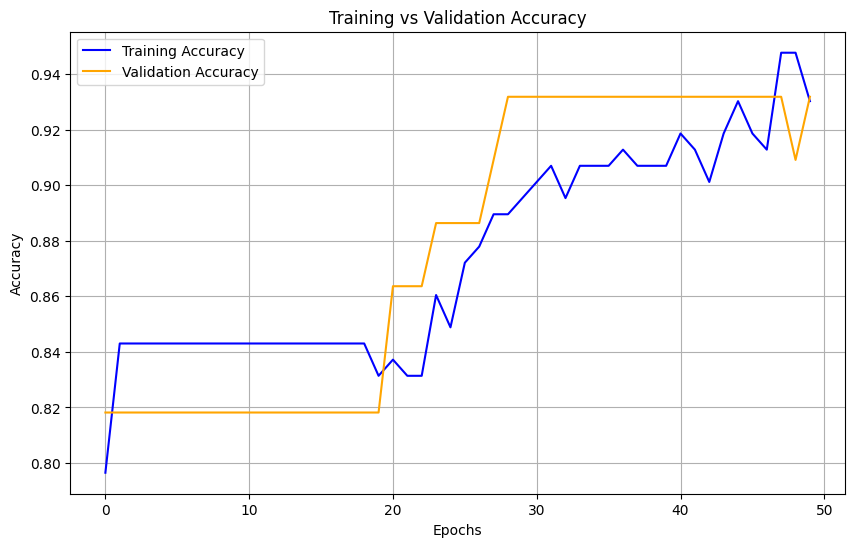

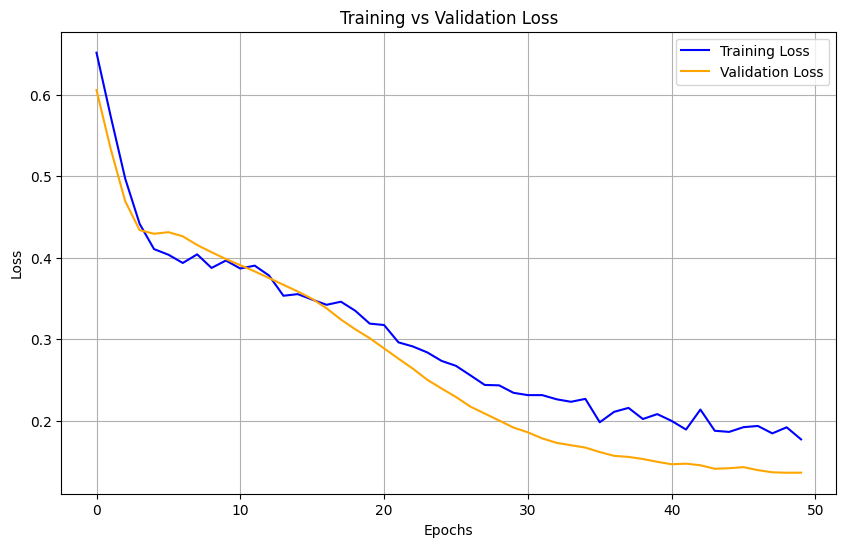

Testing Accuracy: 90.91%
Testing Precision: 83.33%
Testing Recall: 62.50%
Testing F1 Score: 71.43%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Accuracy Graph (Training vs Validation)
def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy',color = 'blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color = 'orange')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Loss Graph (Training vs Validation)
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss',color = "blue")
    plt.plot(history.history['val_loss'], label='Validation Loss',color = 'orange')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the functions to visualize the results
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_classification)

# Accuracy Graph
plot_accuracy(history)

# Loss Graph
plot_loss(history)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Testing Metrics
test_accuracy = accuracy_score(y_test, y_pred_classification)
test_precision = precision_score(y_test, y_pred_classification)
test_recall = recall_score(y_test, y_pred_classification)
test_f1 = f1_score(y_test, y_pred_classification)

# Print the results
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Precision: {test_precision * 100:.2f}%")
print(f"Testing Recall: {test_recall * 100:.2f}%")
print(f"Testing F1 Score: {test_f1 * 100:.2f}%")

